In [ ]:
-- Data Processing:

In [2]:
import pandas as pd
file_path = ("C:\\Users\\Madivoli Analytics\\OneDrive\\Documents\\Projects\\PYTHON\\Superstore\\Superstore (2016-2020).xlsx")
sheets = ['orders_2016', 'orders_2017', 'orders_2018', 'orders_2019', 'orders_2020']
superstore_list = []
for sheet in sheets:
    data = pd.read_excel(file_path, sheet_name=sheet, index_col=0)
    superstore_list.append(data)
sc = pd.concat(superstore_list, ignore_index=True)
print(sc.head())

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2016-115812 2016-06-09 2016-06-14  Standard Class    BH-11710   
1  CA-2016-115812 2016-06-09 2016-06-14  Standard Class    BH-11710   
2  CA-2016-115812 2016-06-09 2016-06-14  Standard Class    BH-11710   
3  CA-2016-115812 2016-06-09 2016-06-14  Standard Class    BH-11710   
4  CA-2016-115812 2016-06-09 2016-06-14  Standard Class    BH-11710   

     Customer Name   Segment Country/Region         City       State  ...  \
0  Brosina Hoffman  Consumer  United States  Los Angeles  California  ...   
1  Brosina Hoffman  Consumer  United States  Los Angeles  California  ...   
2  Brosina Hoffman  Consumer  United States  Los Angeles  California  ...   
3  Brosina Hoffman  Consumer  United States  Los Angeles  California  ...   
4  Brosina Hoffman  Consumer  United States  Los Angeles  California  ...   

   Region       Product ID         Category Sub-Category  \
0    West  FUR-FU-10001487        Furniture  Furni

In [3]:
import pandas as pd
sc.to_csv("C:\\Users\\Madivoli Analytics\\OneDrive\\Documents\\Projects\\PYTHON\\Superstore\\superstore.csv", index=False)

In [ ]:
-- Verifying if the file was created correctly

In [4]:
import os
file_path = "C:\\Users\\Madivoli Analytics\\OneDrive\\Documents\\Projects\\PYTHON\\Superstore\\superstore.csv"
if os.path.exists(file_path):
    print("File successfully created!")

File successfully created!


In [5]:
import pandas as pd

sc = pd.read_csv("C:\\Users\\Madivoli Analytics\\OneDrive\\Documents\\Projects\\PYTHON\\Superstore\\superstore.csv")

sc.rename(columns={
    'Order ID': 'order_id', 'Order Date': 'order_date','Ship Date': 'ship_date',
    'Ship Mode': 'ship_mode', 'Customer ID': 'customer_id','Customer Name': 'customer_name',  
    'Segment': 'segment', 'Country/Region': 'country','City': 'city',
    'State': 'state', 'Postal Code': 'postal_code','Region': 'region',
    'Product ID': 'product_id', 'Category': 'category','Sub-Category': 'sub_category',
    'Product Name': 'product_name', 'Sales': 'sales','Quantity': 'quantity',
    'Discount': 'discount', 'Profit': 'profit','Returned': 'returned'
}, inplace=True)

print(sc.columns)

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'sub_category', 'product_name',
       'sales', 'quantity', 'discount', 'profit', 'returned'],
      dtype='object')


In [6]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11979 entries, 0 to 11978
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       11979 non-null  object 
 1   order_date     11979 non-null  object 
 2   ship_date      11979 non-null  object 
 3   ship_mode      11979 non-null  object 
 4   customer_id    11979 non-null  object 
 5   customer_name  11979 non-null  object 
 6   segment        11979 non-null  object 
 7   country        11979 non-null  object 
 8   city           11979 non-null  object 
 9   state          11979 non-null  object 
 10  postal_code    11968 non-null  float64
 11  region         11979 non-null  object 
 12  product_id     11979 non-null  object 
 13  category       11979 non-null  object 
 14  sub_category   11979 non-null  object 
 15  product_name   11979 non-null  object 
 16  sales          11979 non-null  float64
 17  quantity       11979 non-null  int64  
 18  discou

In [7]:
import pandas as pd
import numpy as np

sc['order_date'] = pd.to_datetime(sc['order_date'])
sc['ship_date'] = pd.to_datetime(sc['ship_date'])

categorical_cols = ['ship_mode', 'segment', 'country', 'region', 'category', 'sub_category', 'returned']
for col in categorical_cols:
    sc[col] = sc[col].astype('category')

sc['postal_code'] = sc['postal_code'].astype('Int64').astype('str')  # Int64 handles NaN values
sc['postal_code'] = sc['postal_code'].replace('<NA>', 'Unknown')

id_cols = ['order_id', 'customer_id', 'product_id']
for col in id_cols:
    sc[col] = sc[col].astype('str')


print("\nData types after conversion:")
print(sc.dtypes)


Data types after conversion:
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode              category
customer_id              object
customer_name            object
segment                category
country                category
city                     object
state                    object
postal_code              object
region                 category
product_id               object
category               category
sub_category           category
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
returned               category
dtype: object


In [8]:
print(sc.isnull().sum())

order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
returned         1
dtype: int64


In [9]:
sc['returned'] = sc['returned'].fillna('No')

print(sc.isnull().sum())

order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
returned         0
dtype: int64


In [9]:
duplicate_rows = sc.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

duplicates = sc[sc.duplicated()]
print(duplicates)

Number of duplicate rows: 1
           order_id order_date  ship_date       ship_mode customer_id  \
696  US-2016-150119 2016-04-23 2016-04-27  Standard Class    LB-16795   

      customer_name      segment        country      city state  ... region  \
696  Laurel Beltran  Home Office  United States  Columbus  Ohio  ...   East   

          product_id   category sub_category  \
696  FUR-CH-10002965  Furniture       Chairs   

                                          product_name    sales  quantity  \
696  Global Leather Highback Executive Chair with P...  281.372         2   

     discount   profit  returned  
696       0.3 -12.0588        No  

[1 rows x 21 columns]


In [ ]:
-- Removing duplicates

In [10]:
sc = sc.drop_duplicates()

print(f"Number of duplicate rows after removal: {sc.duplicated().sum()}")

print(f"DataFrame shape after removing duplicates: {sc.shape}")

Number of duplicate rows after removal: 0
DataFrame shape after removing duplicates: (11978, 21)


In [11]:
sc = sc.reset_index(drop=True)

In [12]:
print(sc.head())

         order_id order_date  ship_date       ship_mode customer_id  \
0  CA-2016-115812 2016-06-09 2016-06-14  Standard Class    BH-11710   
1  CA-2016-115812 2016-06-09 2016-06-14  Standard Class    BH-11710   
2  CA-2016-115812 2016-06-09 2016-06-14  Standard Class    BH-11710   
3  CA-2016-115812 2016-06-09 2016-06-14  Standard Class    BH-11710   
4  CA-2016-115812 2016-06-09 2016-06-14  Standard Class    BH-11710   

     customer_name   segment        country         city       state  ...  \
0  Brosina Hoffman  Consumer  United States  Los Angeles  California  ...   
1  Brosina Hoffman  Consumer  United States  Los Angeles  California  ...   
2  Brosina Hoffman  Consumer  United States  Los Angeles  California  ...   
3  Brosina Hoffman  Consumer  United States  Los Angeles  California  ...   
4  Brosina Hoffman  Consumer  United States  Los Angeles  California  ...   

  region       product_id         category sub_category  \
0   West  FUR-FU-10001487        Furniture  Furnish

In [13]:
import pandas as pd
import numpy as np

# Calculating profit margin (profit as percentage of sales)
sc['profit_margin'] = (sc['profit'] / sc['sales']) * 100

# Handle cases where sales is zero to avoid division by zero
sc['profit_margin'] = np.where(sc['sales'] == 0, 0, sc['profit_margin'])

# Calculating unit price (price per item)
sc['unit_price'] = sc['sales'] / sc['quantity']

# Calculating total cost (sales minus profit)
sc['total_cost'] = sc['sales'] - sc['profit']

# Calculating discount amount (sales * discount percentage)
sc['discount_amount'] = sc['sales'] * sc['discount']

# Calculating net sales (sales after discount)
sc['net_sales'] = sc['sales'] - sc['discount_amount']

# Calculating net profit margin (profit as percentage of net sales)
sc['net_profit_margin'] = (sc['profit'] / sc['net_sales']) * 100
sc['net_profit_margin'] = np.where(sc['net_sales'] == 0, 0, sc['net_profit_margin'])

# Creating a flag for profitable transactions
sc['is_profitable'] = sc['profit'] > 0

# Creating a flag for heavily discounted items (e.g., discount > 30%)
sc['high_discount'] = sc['discount'] > 0.3

# Calculate order processing time (ship date - order date)
sc['processing_days'] = (sc['ship_date'] - sc['order_date']).dt.days

In [14]:
# Displaying the new columns
print(sc[['sales', 'profit', 'quantity', 'discount', 
          'profit_margin', 'unit_price', 'total_cost', 
          'discount_amount', 'net_sales', 'net_profit_margin',
          'is_profitable', 'high_discount']].head(10))

      sales   profit  quantity  discount  profit_margin  unit_price  \
0    48.860  14.1694         7       0.0          29.00       6.980   
1     7.280   1.9656         4       0.0          27.00       1.820   
2   907.152  90.7152         6       0.2          10.00     151.192   
3    18.504   5.7825         3       0.2          31.25       6.168   
4   114.900  34.4700         5       0.0          30.00      22.980   
5  1706.184  85.3092         9       0.2           5.00     189.576   
6   911.424  68.3568         4       0.2           7.50     227.856   
7   665.880  13.3176         6       0.0           2.00     110.980   
8    55.500   9.9900         2       0.0          18.00      27.750   
9     8.560   2.4824         2       0.0          29.00       4.280   

   total_cost  discount_amount  net_sales  net_profit_margin  is_profitable  \
0     34.6906           0.0000    48.8600            29.0000           True   
1      5.3144           0.0000     7.2800            27.0000

In [15]:
print("\nSummary statistics:")
print(sc[['profit_margin', 'unit_price', 'total_cost', 
          'discount_amount', 'net_profit_margin', 'processing_days']].describe())


Summary statistics:
       profit_margin    unit_price    total_cost  discount_amount  \
count   11978.000000  11978.000000  11978.000000     11978.000000   
mean       11.985348     61.142799    204.032881        33.385477   
std        46.718209    144.898773    587.596068       188.567699   
min      -275.000000      0.336000      0.554400         0.000000   
25%         7.500000      5.344000     12.493600         0.000000   
50%        27.000000     16.128000     41.549750         1.036800   
75%        36.250000     63.980000    183.165800        15.113250   
max        50.000000   3773.080000  24449.558400     11319.240000   

       net_profit_margin  processing_days  
count       11978.000000     11978.000000  
mean          -18.477818         3.965854  
std           175.633205         1.734797  
min         -1375.000000         0.000000  
25%             8.000000         3.000000  
50%            28.000000         4.000000  
75%            43.750000         5.000000  
max  

In [16]:
print(sc.columns.tolist())

# This shows a sample of the data with the new columns
print(sc[['sales', 'profit', 'profit_margin', 'unit_price', 'processing_days']].head())

['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit', 'returned', 'profit_margin', 'unit_price', 'total_cost', 'discount_amount', 'net_sales', 'net_profit_margin', 'is_profitable', 'high_discount', 'processing_days']
     sales   profit  profit_margin  unit_price  processing_days
0   48.860  14.1694          29.00       6.980                5
1    7.280   1.9656          27.00       1.820                5
2  907.152  90.7152          10.00     151.192                5
3   18.504   5.7825          31.25       6.168                5
4  114.900  34.4700          30.00      22.980                5


In [ ]:
Creating and saving a clean and enhanced csv file

In [17]:
sc.to_csv("C:\\Users\\Madivoli Analytics\\OneDrive\\Documents\\Projects\\PYTHON\\Superstore\\ss_clean.csv", index=False)

In [18]:
import os
file_path = "C:\\Users\\Madivoli Analytics\\OneDrive\\Documents\\Projects\\PYTHON\\Superstore\\ss_clean.csv"
if os.path.exists(file_path):
    print("File successfully created!")

File successfully created!


In [19]:
import pandas as pd

ss = pd.read_csv("C:\\Users\\Madivoli Analytics\\OneDrive\\Documents\\Projects\\PYTHON\\Superstore\\ss_clean.csv")

print(ss.head())

         order_id  order_date   ship_date       ship_mode customer_id  \
0  CA-2016-115812  2016-06-09  2016-06-14  Standard Class    BH-11710   
1  CA-2016-115812  2016-06-09  2016-06-14  Standard Class    BH-11710   
2  CA-2016-115812  2016-06-09  2016-06-14  Standard Class    BH-11710   
3  CA-2016-115812  2016-06-09  2016-06-14  Standard Class    BH-11710   
4  CA-2016-115812  2016-06-09  2016-06-14  Standard Class    BH-11710   

     customer_name   segment        country         city       state  ...  \
0  Brosina Hoffman  Consumer  United States  Los Angeles  California  ...   
1  Brosina Hoffman  Consumer  United States  Los Angeles  California  ...   
2  Brosina Hoffman  Consumer  United States  Los Angeles  California  ...   
3  Brosina Hoffman  Consumer  United States  Los Angeles  California  ...   
4  Brosina Hoffman  Consumer  United States  Los Angeles  California  ...   

  returned profit_margin unit_price total_cost discount_amount net_sales  \
0       No         29.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a binary target variable for loss-making products
ss['is_loss'] = (ss['profit'] < 0).astype(int)

# Selecting only numeric columns for correlation analysis
numeric_columns = ss.select_dtypes(include=[np.number]).columns

# Calculating correlations with the loss indicator using only numeric columns
correlation_with_loss = ss[numeric_columns].corr()['is_loss'].sort_values(ascending=False)

print("Correlation with Loss Making:")
print(correlation_with_loss)

Correlation with Loss Making:
is_loss              1.000000
discount             0.753921
discount_amount      0.169223
total_cost           0.118092
unit_price           0.025537
sales                0.024292
processing_days     -0.002504
quantity            -0.006868
net_sales           -0.029792
profit              -0.234539
net_profit_margin   -0.591829
profit_margin       -0.765811
Name: is_loss, dtype: float64


In [ ]:
-- Visualizing key factors

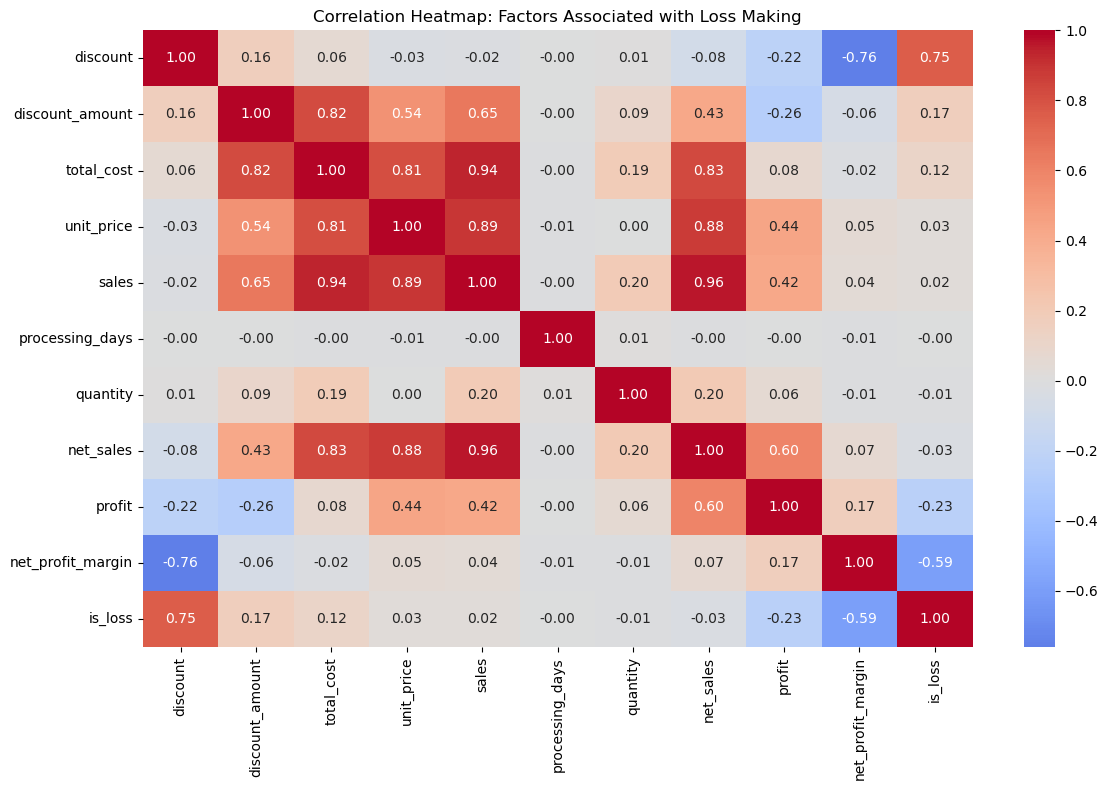

In [22]:
# Creating a heatmap of correlations with loss
plt.figure(figsize=(12, 8))

# Select top 10 numeric features correlated with loss
top_features = correlation_with_loss.drop('is_loss').head(10).index
corr_matrix = ss[list(top_features) + ['is_loss']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap: Factors Associated with Loss Making')
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats


# Establishing variables
X = ss[['discount']]  # Independent variable
y = ss['profit_margin']  # Dependent variable

# Removing any rows with missing values
data = pd.concat([X, y], axis=1).dropna()
X_clean = data[['discount']]
y_clean = data['profit_margin']

# Fitting SLR model
model = LinearRegression()
model.fit(X_clean, y_clean)

# Making predictions
y_pred = model.predict(X_clean)

# Calculating R-squared
r2 = r2_score(y_clean, y_pred)

# Establishing regression coefficients
slope = model.coef_[0]
intercept = model.intercept_

print("=== SIMPLE LINEAR REGRESSION RESULTS: Discount vs Profit Margin ===")
print(f"Regression Equation: Profit Margin = {intercept:.2f} + ({slope:.2f} × Discount)")
print(f"R-squared: {r2:.4f} ({(r2*100):.1f}% of variance explained)")
print(f"Slope: {slope:.2f} (For each 1% increase in discount, profit margin changes by {slope:.2f}%)")
print("\n")

=== SIMPLE LINEAR REGRESSION RESULTS: Discount vs Profit Margin ===
Regression Equation: Profit Margin = 42.63 + (-195.73 × Discount)
R-squared: 0.7475 (74.8% of variance explained)
Slope: -195.73 (For each 1% increase in discount, profit margin changes by -195.73%)




In [26]:
# Calculating break-even discount (where profit margin = 0)
break_even_discount = -intercept / slope if slope != 0 else np.nan
print(f"Break-even discount: {break_even_discount:.2%}")
print(f"Interpretation: Products typically become unprofitable when discounts exceed {break_even_discount:.1%}")

Break-even discount: 21.78%
Interpretation: Products typically become unprofitable when discounts exceed 21.8%


In [ ]:
-- Is there a relationship between the quantity of items purchased, the discount offered, and the total sales value

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Select the key variables for analysis
variables = ['quantity', 'discount', 'sales', 'profit']
analysis_df = ss[variables].copy()

# Calculate correlations
correlation_matrix = analysis_df.corr()
print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Relationships between variables
print("\nKey Relationships:")
print(f"Quantity vs Sales: {analysis_df['quantity'].corr(analysis_df['sales']):.3f}")
print(f"Discount vs Sales: {analysis_df['discount'].corr(analysis_df['sales']):.3f}")
print(f"Quantity vs Discount: {analysis_df['quantity'].corr(analysis_df['discount']):.3f}")
print(f"Discount vs Profit: {analysis_df['discount'].corr(analysis_df['profit']):.3f}")

# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5)
plt.title('Correlation Heatmap: Quantity, Discount, Sales & Profit')
plt.tight_layout()
plt.show()

In [ ]:
--Returned orders 

In [7]:
sr = pd.read_csv("C:\\Users\\Madivoli Analytics\\OneDrive\\Documents\\Projects\\PYTHON\\Superstore\\ss_clean.csv") 
sr['is_returned'] = sr['returned'].map({'Yes': True, 'No': False})

# Count and percentage of returned orders 
print(f"Total orders: {len(sr)}")
print(f"Returned orders: {sr['is_returned'].sum()}")
print(f"Return rate: {sr['is_returned'].mean():.2%}")

Total orders: 11978
Returned orders: 950
Return rate: 7.93%


In [ ]:
--By region

In [9]:
def analyze_categorical_patterns(df, feature):
    """Analyze categorical features and return summary DataFrame"""
    if feature not in df.columns:
        print(f"Error: Column '{feature}' not found in dataset")
        return None
    
    # Calculate return statistics
    summary = df.groupby(feature)['is_returned'].agg(['count', 'sum', 'mean']).round(4)
    summary.columns = ['total_orders', 'returned_orders', 'return_rate']
    summary['return_rate_pct'] = (summary['return_rate'] * 100).round(2)
    
    # Calculate overall statistics
    overall_stats = {
        'feature': feature,
        'highest_return_category': summary['return_rate'].idxmax(),
        'highest_return_rate': summary['return_rate'].max(),
        'lowest_return_category': summary['return_rate'].idxmin(),
        'lowest_return_rate': summary['return_rate'].min(),
        'avg_return_rate': df['is_returned'].mean()
    }
    
    return summary.sort_values('return_rate', ascending=False), overall_stats

# Usage:
category_summary, category_stats = analyze_categorical_patterns(sr, 'region')
print("Summary Statistics:")
print(category_summary)
print("\nOverall Stats:")
print(category_stats)

Summary Statistics:
         total_orders returned_orders return_rate return_rate_pct
region                                                           
West             3862             571    0.147851       14.785085
East             3361             178     0.05296        5.296043
Central          2789             118    0.042309        4.230907
South            1965              83    0.042239        4.223919

Overall Stats:
{'feature': 'region', 'highest_return_category': 'West', 'highest_return_rate': 0.14785085447954427, 'lowest_return_category': 'South', 'lowest_return_rate': 0.042239185750636135, 'avg_return_rate': np.float64(0.07931869416381397)}


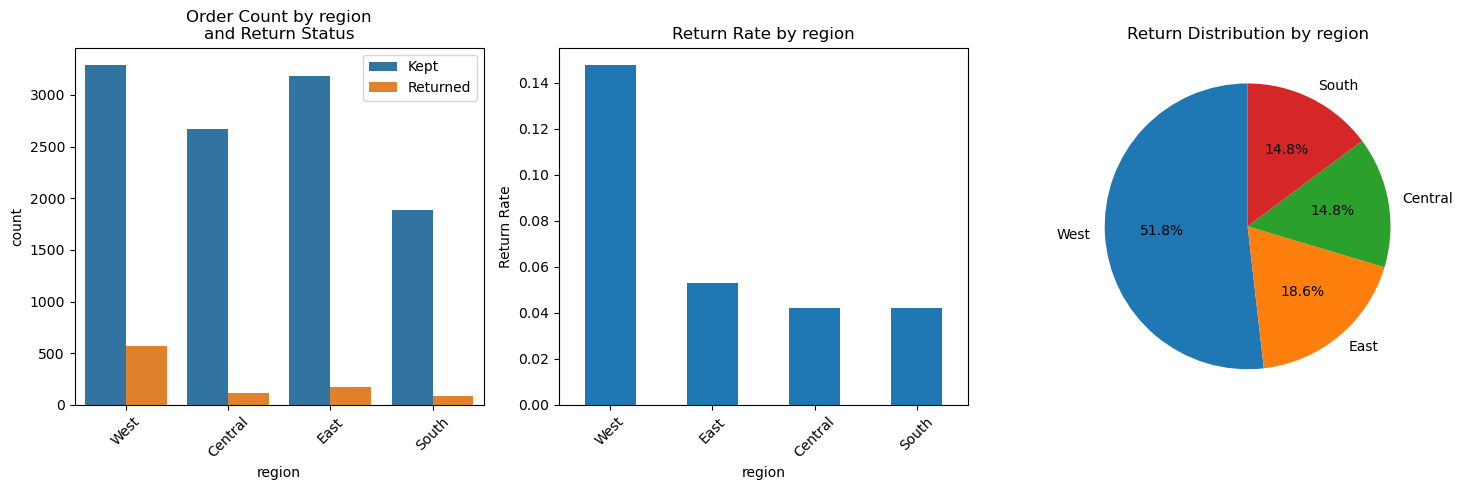

In [13]:
def plot_categorical_patterns(df, feature, summary_data=None):
    """Create plots for categorical feature analysis"""
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Count plot
    plt.subplot(1, 3, 1)
    sns.countplot(data=df, x=feature, hue='is_returned')
    plt.title(f'Order Count by {feature}\nand Return Status')
    plt.xticks(rotation=45)
    plt.legend(['Kept', 'Returned'])
    
    # Plot 2: Return rate bar chart
    plt.subplot(1, 3, 2)
    if summary_data is not None:
        return_rates = summary_data['return_rate']
    else:
        return_rates = df.groupby(feature)['is_returned'].mean().sort_values(ascending=False)
    
    return_rates.plot(kind='bar')
    plt.title(f'Return Rate by {feature}')
    plt.ylabel('Return Rate')
    plt.xticks(rotation=45)
    
    # Plot 3: Return rate percentage
    plt.subplot(1, 3, 3)
    if summary_data is not None:
        return_pct = summary_data['return_rate_pct']
    else:
        return_pct = df.groupby(feature)['is_returned'].mean().sort_values(ascending=False) * 100
    
    plt.pie(return_pct, labels=return_pct.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Return Distribution by {feature}')
    
    plt.tight_layout()
    plt.show()

# Usage:
plot_categorical_patterns(sr, 'region', category_summary)

In [14]:
def calculate_return_distribution(df, feature='region'):
    """Calculate the distribution of returned orders across categories"""
    
    # Count returned orders by region
    returned_orders = df[df['is_returned'] == True].groupby(feature).size()
    
    # Calculate total returns
    total_returns = returned_orders.sum()
    
    # Calculate percentage distribution
    distribution = (returned_orders / total_returns * 100).round(1)
    
    # Create results DataFrame
    result = pd.DataFrame({
        'returned_orders': returned_orders,
        'return_distribution_pct': distribution
    })
    
    return result.sort_values('return_distribution_pct', ascending=False)

# Calculate for your data
distribution_results = calculate_return_distribution(sr, 'region')
print("Return Distribution by Region:")
print(distribution_results)

Return Distribution by Region:
         returned_orders  return_distribution_pct
region                                           
West                 571                     60.1
East                 178                     18.7
Central              118                     12.4
South                 83                      8.7


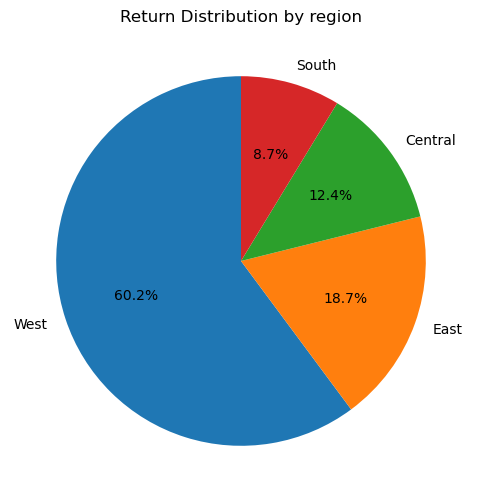

In [15]:
# distribution plot
plt.figure(figsize=(8, 6))
plt.pie(distribution_results['return_distribution_pct'], 
        labels=distribution_results.index, 
        autopct='%1.1f%%', 
        startangle=90)
plt.title('Return Distribution by region')
plt.show()


sales - Return Analysis:
Statistical comparison:
               count        mean         std    min    25%     50%     75%  \
is_returned                                                                  
False        11027.0  233.041795  651.897484  0.444  16.68  53.720  210.68   
True           950.0  220.741543  588.295537  1.680  20.04  57.077  212.36   

                  max  
is_returned            
False        22638.48  
True         13999.96  

T-test results: t-statistic = -0.562, p-value = 0.5740
✗ No statistically significant difference between groups


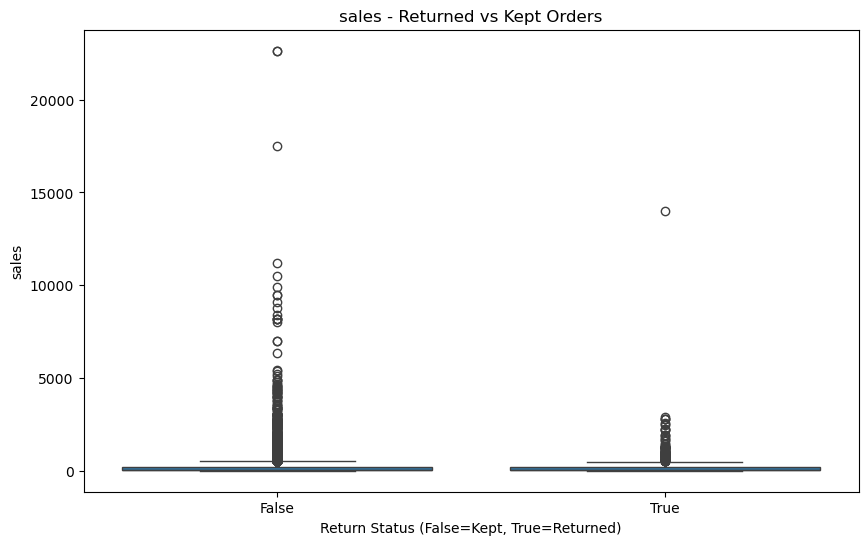

In [18]:
# For numerical features (sales, quantity, discount, profit, etc.)
def analyze_numerical_patterns(df, feature):
    """Analyzing differences between returned and kept orders for a NUMERICAL feature"""
    
    # Check if feature exists
    if feature not in df.columns:
        print(f"Error: Column '{feature}' not found in dataset")
        return
    
    print(f"\n{feature} - Return Analysis:")
    print("=" * 50)
    
    # Statistical summary
    result = df.groupby('is_returned')[feature].describe()
    print("Statistical comparison:")
    print(result)
    
    # T-test to check if difference is statistically significant
    from scipy.stats import ttest_ind
    returned = df[df['is_returned'] == True][feature]
    kept = df[df['is_returned'] == False][feature]
    
    t_stat, p_value = ttest_ind(returned, kept, nan_policy='omit')
    print(f"\nT-test results: t-statistic = {t_stat:.3f}, p-value = {p_value:.4f}")
    
    if p_value < 0.05:
        print("✓ Statistically significant difference between groups")
    else:
        print("✗ No statistically significant difference between groups")
    
    # Visualize with boxplot (appropriate for numerical data)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='is_returned', y=feature, data=df)
    plt.title(f'{feature} - Returned vs Kept Orders')
    plt.xlabel('Return Status (False=Kept, True=Returned)')
    plt.show()

analyze_numerical_patterns(sr, 'sales')

=== DEEPER ANALYSIS OF KEY VARIABLES ===


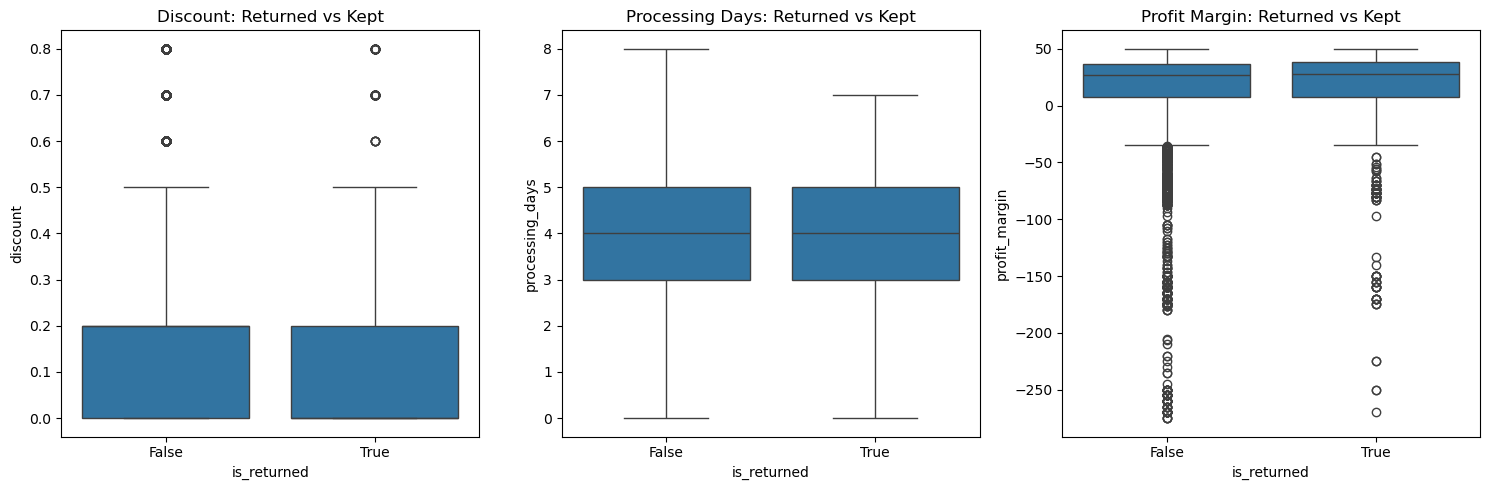


=== CATEGORICAL ANALYSIS ===

region Return Rates:
region
West       0.147851
East        0.05296
Central    0.042309
South      0.042239
Name: is_returned, dtype: object

category Return Rates:
category
Technology            0.085
Furniture          0.079165
Office Supplies    0.077646
Name: is_returned, dtype: object

sub_category Return Rates:
sub_category
Machines       0.113475
Tables         0.094872
Paper          0.091463
Phones         0.090566
Binders        0.088852
Appliances     0.087657
Supplies       0.082609
Fasteners      0.082397
Chairs         0.077957
Furnishings    0.076316
Accessories    0.076004
Bookcases      0.071698
Storage        0.064579
Copiers        0.064103
Art            0.057292
Labels         0.056818
Envelopes      0.048701
Name: is_returned, dtype: object

ship_mode Return Rates:
ship_mode
Same Day          0.132701
First Class       0.091904
Standard Class      0.0741
Second Class      0.071029
Name: is_returned, dtype: object


In [11]:
# Since linear correlations are weak, let's check for non-linear patterns
print("=== DEEPER ANALYSIS OF KEY VARIABLES ===")

# 1. Analyze discount patterns
plt.figure(figsize=(15, 5))

# Discount vs Returns
plt.subplot(1, 3, 1)
sns.boxplot(x='is_returned', y='discount', data=sr)
plt.title('Discount: Returned vs Kept')

# Processing days vs Returns
plt.subplot(1, 3, 2)
sns.boxplot(x='is_returned', y='processing_days', data=sr)
plt.title('Processing Days: Returned vs Kept')

# Profit margin vs Returns
plt.subplot(1, 3, 3)
sns.boxplot(x='is_returned', y='profit_margin', data=sr)
plt.title('Profit Margin: Returned vs Kept')

plt.tight_layout()
plt.show()

# 2. Check categorical variables (these don't show in correlation)
print("\n=== CATEGORICAL ANALYSIS ===")
categorical_features = ['region', 'category', 'sub_category', 'ship_mode']
for feature in categorical_features:
    if feature in sr.columns:
        return_rate = sr.groupby(feature)['is_returned'].mean().sort_values(ascending=False)
        print(f"\n{feature} Return Rates:")
        print(return_rate)

In [21]:
# If you want to analyze specific columns only
specific_columns = ['is_returned', 'sales', 'quantity', 'discount', 'profit', 'unit_price']

# Filter to only columns that exist in your DataFrame
existing_columns = [col for col in specific_columns if col in sr.columns]

print("Columns for correlation analysis:", existing_columns)

if 'is_returned' in existing_columns:
    # Convert boolean to numeric if needed
    sr_temp = sr[existing_columns].copy()
    if sr_temp['is_returned'].dtype == bool:
        sr_temp['is_returned'] = sr_temp['is_returned'].astype(int)
    
    correlation_results = sr_temp.corr()['is_returned'].sort_values(ascending=False)
    print("\nCorrelation with returns (selected columns):")
    print(correlation_results)
else:
    print("'is_returned' column not available for analysis")

Columns for correlation analysis: ['is_returned', 'sales', 'quantity', 'discount', 'profit', 'unit_price']

Correlation with returns (selected columns):
is_returned    1.000000
unit_price    -0.003287
quantity      -0.003663
profit        -0.003946
sales         -0.005137
discount      -0.015460
Name: is_returned, dtype: float64
